<a href="https://colab.research.google.com/github/mirsaidl/Face_Recognition/blob/main/roommates_facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition**

In [1]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=b025f227f35f1eeb39f2a24337b920a875a75e1fe2936335af1367fac9564529
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
doston = cv2.imread('doston.jpg')
mirsaid = cv2.imread('mirsaid.jpg')
elbek = cv2.imread('elbek.jpg')
shohruh = cv2.imread('shohruh.jpg')

In [12]:
import face_recognition

doston_img = face_recognition.load_image_file('doston.jpg')
elbek_img = face_recognition.load_image_file('elbek.jpg')
shohruh_img = face_recognition.load_image_file('shohruh.jpg')
mirsaid_img = face_recognition.load_image_file('mirsaid.jpg')

doston_encoding = face_recognition.face_encodings(doston_img)[0]
mirsaid_encoding = face_recognition.face_encodings(mirsaid_img)[0]
shohruh_encoding = face_recognition.face_encodings(shohruh_img)[0]
elbek_encoding = face_recognition.face_encodings(elbek_img)[0]

In [9]:
# Compare faces
result = face_recognition.compare_faces([elbek_encoding], mirsaid_encoding)
print(f'Face Match is {result[0]}')

Face Match is False


In [11]:
result = face_recognition.compare_faces([doston_encoding], mirsaid_encoding)
print(f'Face Match is {result[0]}')

Face Match is False


### **Face recognition in an image**

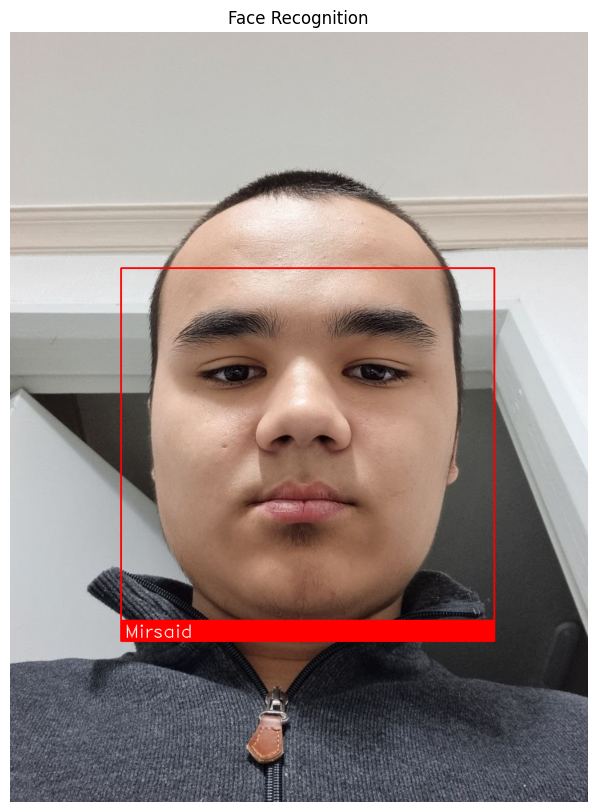

In [33]:
known_face_encodings = [
    mirsaid_encoding,
    doston_encoding,
    elbek_encoding,
    shohruh_encoding,
]

known_face_names = [
    'Mirsaid',
    'Doston',
    'Elbek',
    'Shohruh'
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True


# Grab a single frame of video
frame = cv2.imread('/content/mirsaid_test.jpg')

# Resize frame of video to 1/4 size for faster face recognition processing
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
# Only process every other frame of video to save time
if process_this_frame:
    # Find all the faces and face encodings in the current frame
    face_locations = face_recognition.face_locations(small_frame)
    face_encodings = face_recognition.face_encodings(small_frame, face_locations, num_jitters=1)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"

        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)


# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image
imshow('Face Recognition', frame)

In [ ]:
known_face_encodings = [
    mirsaid_encoding,
    doston_encoding,
    elbek_encoding,
    shohruh_encoding,
]

known_face_names = [
    'Mirsaid',
    'Doston',
    'Elbek',
    'Shohruh'
]

# Initialize variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

# Open video capture
video_capture = cv2.VideoCapture('video.mp4')

# Get the dimensions of the input video
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height))

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    if not ret:
        print("No frame captured, exiting...")
        break

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame
        face_locations = face_recognition.face_locations(small_frame)
        face_encodings = face_recognition.face_encodings(small_frame, face_locations, num_jitters=1)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame

    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Write the frame with face recognition annotations to the output video
    out.write(frame)

    # Display the resulting image
    imshow('Video', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer, and close all windows
video_capture.release()
out.release()
cv2.destroyAllWindows()

In [45]:
!ffmpeg -i output.avi face_recog_roommates.mp4 -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab